In [ ]:
import pandas as pd
rssi = pd.read_csv('/content/drive/MyDrive/Hack Zurich 2021 data/rssi.csv')

In [ ]:
noise=rssi['A1_TotalTel']-rssi['A1_ValidTel']
noise.value_counts()

0         2344720
253        244145
1          212700
1225       209661
252        201136
           ...   
72620           1
39836           1
154565          1
88997           1
73524           1
Length: 129718, dtype: int64

In [ ]:
rssi['noise'] = noise

In [ ]:
snr = rssi['A1_ValidTel']/rssi['noise']

In [ ]:
rssi['snr'] = snr

In [ ]:
rssi.to_csv("/content/drive/MyDrive/Hack Zurich 2021 data/rssiNew.csv")

In [ ]:
import pandas as pd
rssiNew = pd.read_csv('/content/drive/MyDrive/Hack Zurich 2021 data/rssiNew.csv')

In [ ]:
rssiBad = rssiNew[((rssiNew['A2_RSSI'] <= 2) & (rssiNew['snr'] <= 100)) | (rssiNew['A1_TotalTel'] == rssiNew['A1_ValidTel'])]

In [ ]:
rssiBad.to_csv("/content/drive/MyDrive/Hack Zurich 2021 data/rssiBad.csv")

In [ ]:
rssiBad

,Unnamed: 0,ID,DateTime,AreaNumber,Track,Position,PositionNoLeap,Latitude,Longitude,A1_TotalTel,A1_ValidTel,A2_RSSI,A2_TotalTel,A2_ValidTel,noise,snr
1,1,2,2021-01-09 00:00:02,33,1,315404,322154,47.310308,8.115033,1754750,1731254,1.99,1553802,1549611,23496,73.682925
4,4,5,2021-01-09 00:00:05,33,1,315601,322351,47.310145,8.115134,1754764,1731268,1.75,1553816,1549625,23496,73.683521
5,5,6,2021-01-09 00:00:06,33,1,315653,322403,47.310100,8.115154,1754769,1731273,1.85,1553821,1549630,23496,73.683733
6,6,7,2021-01-09 00:00:07,33,1,315700,322450,47.310060,8.115172,1754774,1731278,1.98,1553826,1549635,23496,73.683946
7,7,8,2021-01-09 00:00:08,33,1,315740,322490,47.310025,8.115188,1754779,1731283,1.99,1553831,1549640,23496,73.684159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30975147,30975147,31016439,2021-06-25 07:41:22,9,100,100247,100247,47.307274,8.050493,79110,79110,1.07,78912,78911,0,inf
30975148,30975148,31016440,2021-06-25 07:41:23,9,100,100231,100231,47.307259,8.050490,79115,79115,1.10,78912,78911,0,inf
30975149,30975149,31016441,2021-06-25 07:41:24,9,100,100216,100216,47.307246,8.050487,79119,79119,1.00,78912,78911,0,inf
30975150,30975150,31016442,2021-06-25 07:41:25,9,100,100201,100201,47.307233,8.050485,79124,79124,1.11,78912,78911,0,inf


In [2]:
import pandas as pd
disruption = pd.read_csv('/content/drive/My Drive/Hack Zurich 2021 data/disruptions.csv')
disruption

,ID,DateTime,DisruptionCode,Description
0,1,2020-02-08 04:37:25,960862267,Stoerung: Zwangsbremse wurde aktiviert
1,2,2020-02-08 04:41:39,960862267,Stoerung: Zwangsbremse wurde aktiviert
2,3,2020-02-08 08:06:31,960862267,Stoerung: Zwangsbremse wurde aktiviert
3,4,2020-02-08 16:18:53,960862267,Stoerung: Zwangsbremse wurde aktiviert
4,5,2020-02-10 03:06:12,960862267,Stoerung: Zwangsbremse wurde aktiviert
...,...,...,...,...
2112,5639,2021-06-24 16:50:14,960862267,Zwangsbremse wurde aktiviert
2113,5640,2021-06-25 05:25:20,960862267,Zwangsbremse wurde aktiviert
2114,5641,2021-06-25 06:45:00,960862267,Zwangsbremse wurde aktiviert
2115,5642,2021-06-25 07:39:28,960862267,Zwangsbremse wurde aktiviert


In [ ]:
for i in range(0, disruption.shape[0]):
  k = i
  date = disruption['DateTime'][i]
  for j in range(0, rssiBad.shape[0]):
    if date == rssiBad['DateTime'][j]:
      k = j
      print(k)

NameError: ignored

In [ ]:
index = -1

for i in range(0, rssiBad.shape[0]) :
  # print(rssipart2['DateTime'][i])
  if rssiBad['DateTime'][i] == '2021-02-25 16:35:57':
    index = i

index

KeyError: ignored

In [ ]:
r = rssiNew.loc[24100200:24100382]

In [ ]:
disruption['Description'][1531]

'Zwangsbremse wurde aktiviert'

In [ ]:
index = -1

for i in range(0, disruption.shape[0]) :
  # print(rssipart2['DateTime'][i])
  if disruption['DateTime'][i] == '2021-02-25 16:35:57':
    index = i

index

1531

In [ ]:
index = -1
min = r['snr'].min()
for i in range(24100200, 24100382) :
  # print(rssipart2['DateTime'][i])
  if r['snr'][i] == min : 
    index = i

index
# r['snr'].min()

24100200

In [ ]:
r.loc[24100200:]

,Unnamed: 0,ID,DateTime,AreaNumber,Track,Position,PositionNoLeap,Latitude,Longitude,A1_TotalTel,A1_ValidTel,A2_RSSI,A2_TotalTel,A2_ValidTel,noise,snr
24100200,24100200,24140184,2021-02-25 16:32:55,40,1,415518,422268,47.245234,8.187357,3940711,3775428,2.30,3007068,3002614,165283,22.842204
24100201,24100201,24140185,2021-02-25 16:32:56,40,1,415689,422439,47.245094,8.187449,3940716,3775433,2.26,3007073,3002619,165283,22.842234
24100202,24100202,24140186,2021-02-25 16:32:57,40,1,415855,422605,47.244958,8.187538,3940720,3775437,2.27,3007077,3002623,165283,22.842258
24100203,24100203,24140187,2021-02-25 16:32:58,40,1,416018,422768,47.244824,8.187626,3940725,3775442,2.23,3007082,3002628,165283,22.842289
24100204,24100204,24140188,2021-02-25 16:32:59,40,1,416179,422929,47.244692,8.187712,3940730,3775447,2.30,3007087,3002633,165283,22.842319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24100378,24100378,24140362,2021-02-25 16:35:53,40,2,420505,427255,47.240980,8.189333,3941525,3776242,2.16,3007882,3003428,165283,22.847129
24100379,24100379,24140363,2021-02-25 16:35:54,40,2,420505,427255,47.240980,8.189333,3941530,3776247,2.09,3007887,3003433,165283,22.847159
24100380,24100380,24140364,2021-02-25 16:35:55,40,2,420505,427255,47.240980,8.189333,3941534,3776251,2.16,3007891,3003437,165283,22.847183
24100381,24100381,24140365,2021-02-25 16:35:56,40,2,420505,427255,47.240980,8.189333,3941539,3776256,2.20,3007896,3003442,165283,22.847214


In [ ]:
{
    "1": {
      "alert_signal_data": {
          "Latitude": 47.245234,		
          "Longitude": 8.187357,
          "DateTime": '2021-02-25 16:32:55',
          "noise": 165283, 	
          "snr": 22.842204,
          "RSSI": 2.30
          "disruptionDiscriptionEnglish": "Emergency brake activated",
          "disruptionDiscriptionGerman": "Zwangsbremse wurde aktiviert",
          "cause": "external interferance"
      },
      "occured_signal_data": {
          "Latitude": 47.240980,
          "Longitude": 8.189333,	
          "DateTime": '2021-02-25 16:35:57',
          "noise": 165283,	
          "snr": 22.847238,
          "RSSI": 2.16
          "disruptionDiscriptionEnglish": "Emergency brake activated",
          "disruptionDiscriptionGerman": "Zwangsbremse wurde aktiviert",
          "cause": "external interferance"
      }
    }
}

In [3]:
import pandas as pd
rssiBad = pd.read_csv('/content/drive/MyDrive/Hack Zurich 2021 data/rssiBad.csv')

In [ ]:
count = 0
for i in range(0, rssiBad.shape[0]) :
  if rssiBad['A1_TotalTel'][i] == rssiBad['A1_ValidTel'][i]: 
    count += 1

count

0

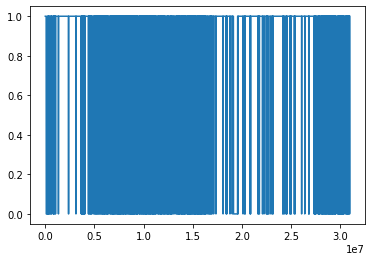

In [ ]:
import matplotlib.pyplot as plt
plt.plot(rssiNew['snr'] < 50000)

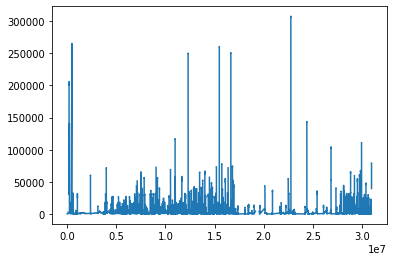

In [ ]:
import matplotlib.pyplot as plt
plt.plot(rssiNew['snr'])

In [ ]:
import datacompy
compare = datacompy.Compare(
rssi,
disrup,
join_columns='DateTime', #You can also specify a list of columns
abs_tol=0.0001,
rel_tol=0,
df1_name='rssi,
df2_name='disrup')

In [ ]:
index = -1

for i in range(0, rssiBad.shape[0]) :
  if rssiBad['DateTime'][i] == '2021-02-25 16:35:57':
    index = i

index

-1

ModuleNotFoundError: ignored

In [4]:
finalData = {}
for i in range(0, disruption.shape[0]):
  occured_signal_data = {}
  alert_signal_data = {}
  k = i
  date = disruption['DateTime'][i]
  for j in range(0, rssiBad.shape[0]):
    if date == rssiBad['DateTime'][j]:
      k = j
      print(i, end=" ")
      print(k)
      break

  if k==i:
    continue
  
  row = rssiBad.iloc[k,:]
  occured_signal_data['disruptionDiscriptionGerman'] = disruption['Description'][i]
  alert_signal_data['disruptionDiscriptionGerman'] = disruption['Description'][i]
  
  occured_signal_data["Latitude"] = row['Latitude']	
  occured_signal_data["Longitude"] = row['Longitude']
  occured_signal_data["DateTime"] = row['DateTime']
  occured_signal_data["noise"] = row['noise'] 	
  occured_signal_data["snr"] = row['snr']
  occured_signal_data["RSSI"] = row['A2_RSSI']

  count = 0
  prevDT = rssiBad['DateTime'][k]
  for l in range(k-1, 0, -1):
    dateTime = rssiBad['DateTime'][l]
    dateTime = dateTime.split(' ')
    prevDT = prevDT.split(' ')
    str1 =  dateTime[1].split(':');
    str2 =  prevDT[1].split(':');
    totalSeconds1 = int(str1[0] * 3600 + str1[1] * 60 + str1[0]);
    totalSeconds2 = int(str2[0] * 3600 + str2[1] * 60 + str2[0]);

    if (totalSeconds2 - totalSeconds1 == 1):
      count +=1
    else:
      break
    prevDT = rssiBad['DateTime'][l]



  r = rssiBad.loc[count:k]
  index = -1
  min = r['snr'].min()
  for m in range(count, k) :
    if r['snr'][m] == min : 
      index = m

  

  row = rssiBad.iloc[index,:]
  alert_signal_data["Latitude"] = row['Latitude']	
  alert_signal_data["Longitude"] = row['Longitude']
  alert_signal_data["DateTime"] = row['DateTime']
  alert_signal_data["noise"] = row['noise'] 	
  alert_signal_data["snr"] = row['snr']
  alert_signal_data["RSSI"] = row['A2_RSSI']

  finalData[i+1] = {}
  finalData[i+1]['occured_signal_data'] = occured_signal_data
  finalData[i+1]['alert_signal_data'] = alert_signal_data

  
print(finalData)

0 197161
1 197415
4 200830
5 200991
7 201654
8 201901
103 226223
104 226409
131 253678
132 253903
137 273734
138 273779
139 273807
140 274002
142 281739
143 281883
144 283795
145 285482
146 285804
147 285892
148 290650
149 292316
150 292929
152 307275
153 307284
154 307449
165 311005
166 311707
167 311929
168 311956
169 312604
171 314964
172 315118
173 318560
176 320379
177 320495
182 321900
183 322021
184 324920
187 327260
188 327798
189 328161
195 330792
196 331396
197 331836
198 331836
207 334471
208 334471
209 334612
210 334612
211 338017
212 338017
215 340813
216 340813
217 340948
218 340948
219 341391
220 341391
221 344389
222 344389
223 344398
224 344398
225 344518
226 344518
227 348393
228 348393
235 350879
236 350879
237 351109
238 351109
239 351402
240 351402
251 353672
252 353672
253 354189
254 354189
265 357911
266 357911
267 358106
268 358106
269 358627
270 358627
271 360948
272 360948
273 360998
274 360998
275 361143
276 361143
277 362145
278 362145
279 365222
280 365222


KeyboardInterrupt: ignored

In [ ]:
row = rssiBad.iloc[197161,:]
row

In [5]:
finalData

{1: {'alert_signal_data': {'DateTime': '2020-02-07 11:07:02',
   'Latitude': 47.30732173413582,
   'Longitude': 8.050502767781706,
   'RSSI': 1.04,
   'disruptionDiscriptionGerman': 'Stoerung: Zwangsbremse wurde aktiviert',
   'noise': 31,
   'snr': 0.9032258064516128},
  'occured_signal_data': {'DateTime': '2020-02-08 04:37:25',
   'Latitude': 47.30499953942523,
   'Longitude': 8.049524883099384,
   'RSSI': 2.98,
   'disruptionDiscriptionGerman': 'Stoerung: Zwangsbremse wurde aktiviert',
   'noise': 0,
   'snr': inf}},
 2: {'alert_signal_data': {'DateTime': '2020-02-07 11:07:02',
   'Latitude': 47.30732173413582,
   'Longitude': 8.050502767781706,
   'RSSI': 1.04,
   'disruptionDiscriptionGerman': 'Stoerung: Zwangsbremse wurde aktiviert',
   'noise': 31,
   'snr': 0.9032258064516128},
  'occured_signal_data': {'DateTime': '2020-02-08 04:41:39',
   'Latitude': 47.305203672346146,
   'Longitude': 8.04961343302451,
   'RSSI': 1.44,
   'disruptionDiscriptionGerman': 'Stoerung: Zwangsbrems

In [10]:
len(finalData)

301

In [14]:
# import json
# with open('/content/drive/MyDrive/Hack Zurich 2021 data/data.json', 'w') as fp:
#     json.dump(finalData, fp)